In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
# K.set_image_data_format(‘channels_last’)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/shim 22-4-21/train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(299,299), class_mode='categorical')

Found 5402 images belonging to 9 classes.


In [5]:
val_path = '/content/drive/MyDrive/shim 22-4-21/test'
val_datagen = ImageDataGenerator(rescale=1. / 255)
val = val_datagen.flow_from_directory(val_path, target_size=(299,299), class_mode='categorical')

Found 1080 images belonging to 9 classes.


In [6]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 299, 299, 3)
Batch Size for Output Image :  (32, 9)
Image Size of first image :  (299, 299, 3)
Output of first image :  (9,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0. 0. 0. 0.]')

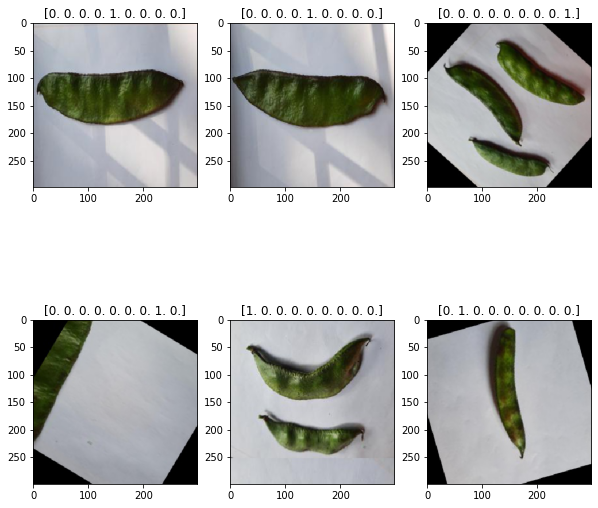

In [7]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [8]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(9,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [9]:
alex = AlexNet(train[0][0].shape[1:])

In [10]:
# alex.summary()

In [11]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [12]:
history = alex.fit_generator(train,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
169/169 [==============================] - 3104s 18s/step - loss: 22.0462 - accuracy: 0.1791
Epoch 2/15
169/169 [==============================] - 31s 183ms/step - loss: 1.5052 - accuracy: 0.4137
Epoch 3/15
169/169 [==============================] - 31s 182ms/step - loss: 1.0839 - accuracy: 0.5893
Epoch 4/15
169/169 [==============================] - 31s 182ms/step - loss: 0.7865 - accuracy: 0.7181
Epoch 5/15
169/169 [==============================] - 31s 181ms/step - loss: 0.4596 - accuracy: 0.8298
Epoch 6/15
169/169 [==============================] - 31s 182ms/step - loss: 0.4185 - accuracy: 0.8548
Epoch 7/15
169/169 [==============================] - 31s 181ms/step - loss: 0.3463 - accuracy: 0.8764
Epoch 8/15
169/169 [==============================] - 31s 181ms/step - loss: 0.3605 - accuracy: 0.8667
Epoch 9/15
169/169 [==============================] - 31s 181ms/step - loss: 0.2902 - accuracy: 0.9041
Epoch 10/15
169/169 [==============================] - 31s 181ms/step - 

In [13]:
val_history = alex.fit_generator(val,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
34/34 [==============================] - 535s 16s/step - loss: 0.2458 - accuracy: 0.9222
Epoch 2/15
34/34 [==============================] - 6s 180ms/step - loss: 0.2918 - accuracy: 0.9120
Epoch 3/15
34/34 [==============================] - 6s 180ms/step - loss: 0.2181 - accuracy: 0.9259
Epoch 4/15
34/34 [==============================] - 6s 180ms/step - loss: 0.1811 - accuracy: 0.9324
Epoch 5/15
34/34 [==============================] - 6s 181ms/step - loss: 0.1414 - accuracy: 0.9481
Epoch 6/15
34/34 [==============================] - 6s 180ms/step - loss: 0.1590 - accuracy: 0.9481
Epoch 7/15
34/34 [==============================] - 6s 180ms/step - loss: 0.1716 - accuracy: 0.9435
Epoch 8/15
34/34 [==============================] - 6s 181ms/step - loss: 0.2488 - accuracy: 0.9120
Epoch 9/15
34/34 [==============================] - 6s 180ms/step - loss: 0.1770 - accuracy: 0.9370
Epoch 10/15
34/34 [==============================] - 6s 181ms/step - loss: 0.1182 - accuracy: 0.9556

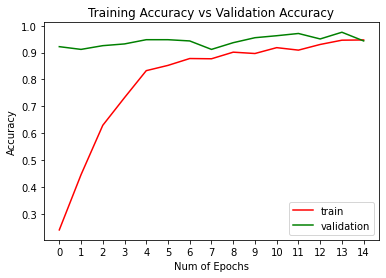

In [14]:
plt.plot(history.history['accuracy'],'r')
plt.plot(val_history.history['accuracy'],'g')
plt.xticks(np.arange(0, 15, 1.0))
plt.rcParams['figure.figsize'] = (15, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

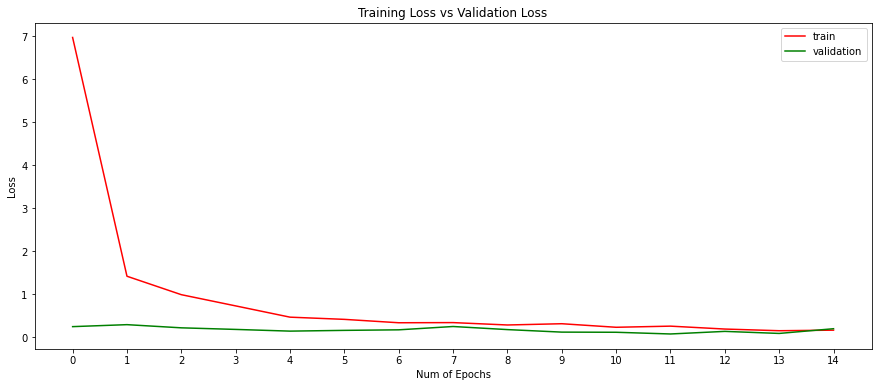

In [15]:
# plt.figure(0)
# plt.plot(history.history['accuracy'],'r')
# plt.plot(val_history.history['accuracy'],'g')
# plt.xticks(np.arange(0, 50, 1.0))
# plt.rcParams['figure.figsize'] = (15, 6)
# plt.xlabel("Num of Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training Accuracy vs Validation Accuracy")
# plt.legend(['train','validation'])


plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(val_history.history['loss'],'g')
plt.xticks(np.arange(0, 15, 1.0))
plt.rcParams['figure.figsize'] = (15, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [16]:
# alex.evaluate_generator(train)

In [30]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Accuracy = " + str(preds[1]*3))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 7.752480506896973
Accuracy = 0.9027778208255768


In [27]:
score = alex.evaluate_generator(test)
print(' loss:', score[0])
print('Accuracy:', score[1]*3)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


 loss: 7.75247859954834
Accuracy: 0.9027778208255768
